# Imports and static stuff

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import os
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Plot

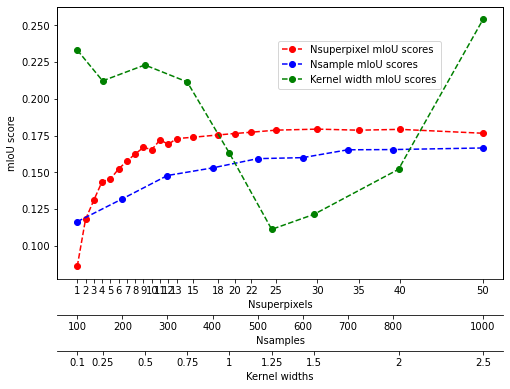

In [3]:

### FUNCTIONS ###
def map_x_axis_values(x_values):
    """
    Map function x_values (nsamples, nsuperpixels or kernel width) to common x-axis values
    between 0 and 1.
    Inputs:
        x_values: nsamples, nsuperpixels or kernel width
    Outputs:
        mapped_x_values: x_values bounded between 0 and 1. Relative to the maximum x-value.
    """
    x_max = max(x_values)
    mapped_x_values = list()
    for x in x_values:
        mapped_x_values.append(x / x_max)
    return mapped_x_values


### DATA ###
n_superpixels = [(1, 0.08607908178678501), 
(2, 0.1180806882770963),
(3, 0.13113178584605523),
(4, 0.14378491947772787),
(5, 0.14553117118007522),
(6, 0.15242260117904474),
(7, 0.15771247034663402),
(8, 0.1626098123570952),
(9, 0.16704510457652283),
(10, 0.1655695844758959),
(11, 0.17214541112224094),
(12, 0.16916859154379774),
(13, 0.17306850325860731),
(15, 0.17395828262858268),
(18, 0.17551462124579367),
(20, 0.17649009454819437),
(22, 0.177379812870003), 
(25, 0.17878613847103364),
(30, 0.17949105963008571),
(35, 0.17876217959981824),
(40, 0.17932475616010177),
(50,  0.17667547850023865)]


n_sample_scores = [(100, 0.11654648042503934),
(200, 0.1320656655819079),
(300, 0.14793501882833388),
(400, 0.15310639724759906),
(500, 0.15940508649159307),
(600, 0.1600886820961318),
(700, 0.16542795922648496),
(800, 0.1655824313546497),
(1000, 0.16666724204796904)]

kernel_width_scores = [(0.1, 0.2332521213),
(0.25, 0.21231251),
(0.5, 0.223124115136316),
(0.75, 0.21161632),
(1, 0.163126326315),
(1.25, 0.1113109351805),
(1.5, 0.121516161),
(2, 0.1521521),
(2.5, 0.2541516161)]

### Plotting code ###

# Plot Nsuperpixel results
superpixels = [val[0] for val in n_superpixels]
superpixel_scores = [val[1] for val in n_superpixels]
mapped_superpixels = map_x_axis_values(superpixels)

f = plt.figure(figsize=(8,5))
ax1 = f.add_subplot(1,1,1)
ax1.plot(mapped_superpixels , superpixel_scores, "r--o", label = "Nsuperpixel mIoU scores")
ax1.set_xticks(mapped_superpixels)
ax1.set_xticklabels(superpixels, fontsize = 10)
ax1.set_ylabel("mIoU score")
ax1.set_xlabel("Nsuperpixels")

# Plot Nsample results
samples = [val[0] for val in n_sample_scores]
sample_scores = [val[1] for val in n_sample_scores]
mapped_nsamples = map_x_axis_values(samples)

ax2 = ax1.twiny()
ax2.plot(mapped_nsamples, sample_scores, "b--o", label = "Nsample mIoU scores" )
ax2.set_xticks(mapped_nsamples)
ax2.set_xticklabels(samples, fontsize = 10)
ax2.spines['bottom'].set_position(('outward', 36))
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.set_xlabel("Nsamples")

# Plot kernel width results
widths = [val[0] for val in kernel_width_scores]
width_scores = [val[1] for val in kernel_width_scores]
mapped_widths = map_x_axis_values(widths)

ax3 = ax1.twiny()
ax3.plot(mapped_widths, width_scores, "g--o", label = "Kernel width mIoU scores" )
ax3.set_xticks(mapped_widths)
ax3.set_xticklabels(widths, fontsize = 10)
ax3.spines['bottom'].set_position(('outward', 72))
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.set_xlabel("Kernel widths")

#set legend
f.legend(bbox_to_anchor=(0.8, 0.8))

# Save the figure
#plt.savefig('two_xticks_under.png', bbox_inches='tight', pad_inches=0.02, dpi=150)

# Finding hyperparameter optimum

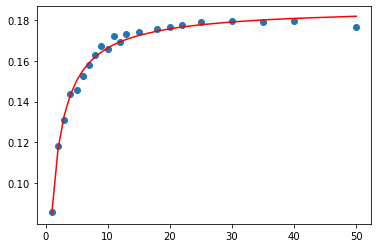

9 percent quantile 0.16749723056212315 
Nsuperpixels: 1 --> 0.08499840626438733 
Nsuperpixels: 2 --> 0.11663543372161929 
Nsuperpixels: 3 --> 0.1331787503465374 
Nsuperpixels: 4 --> 0.14335270482672224 
Nsuperpixels: 5 --> 0.15024296087160074 
Nsuperpixels: 6 --> 0.15521882486774294 
Nsuperpixels: 7 --> 0.1589810576191608 
Nsuperpixels: 8 --> 0.16192554265681325 
Nsuperpixels: 9 --> 0.16429284041093214 
Nsuperpixels: 10 --> 0.1662375668304779 
Nsuperpixels: 11 --> 0.16786363164510962 


In [4]:
### Superpixels ###
def f(x, a, b, n):
    return a * x ** n  / (x ** n + b)

y = superpixel_scores
x = superpixels
#popt, pcov = curve_fit(f, x, y, p0=[1800., 20., 1.])

popt, pcov = curve_fit(f, x, y)

plt.scatter(x, y)
plt.plot(x, f(x, *popt), 'r-')
plt.show()

print(f"9 percent quantile {0.9*popt[0]} ")
for i in range(1, 30):
    score = f(i, *popt)
    print(f"Nsuperpixels: {i} --> {score} ")
    if score >= 0.9*popt[0]:
        break

In [ ]:
### Kernel widths ### 

In [ ]:
### N samples ###